
Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        50 non-null     object 
 1   Crime Type  50 non-null     object 
 2   Latitude    50 non-null     float64
 3   Longitude   50 non-null     float64
 4   Location    50 non-null     object 
 5   Severity    50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.5+ KB
None

Statistical Summary:
        Latitude   Longitude
count  50.000000   50.000000
mean   37.135800  -98.328618
std     7.317146   16.252681
min    25.266358 -124.289132
25%    30.509599 -111.927437
50%    37.570721  -98.288631
75%    42.666670  -88.509580
max    48.941102  -66.740335


C:\Users\pavan\AppData\Local\Temp\ipykernel_25256\660742975.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Crime Type", data=crime_data, palette="coolwarm", order=crime_data["Crime Type"].value_counts().index)


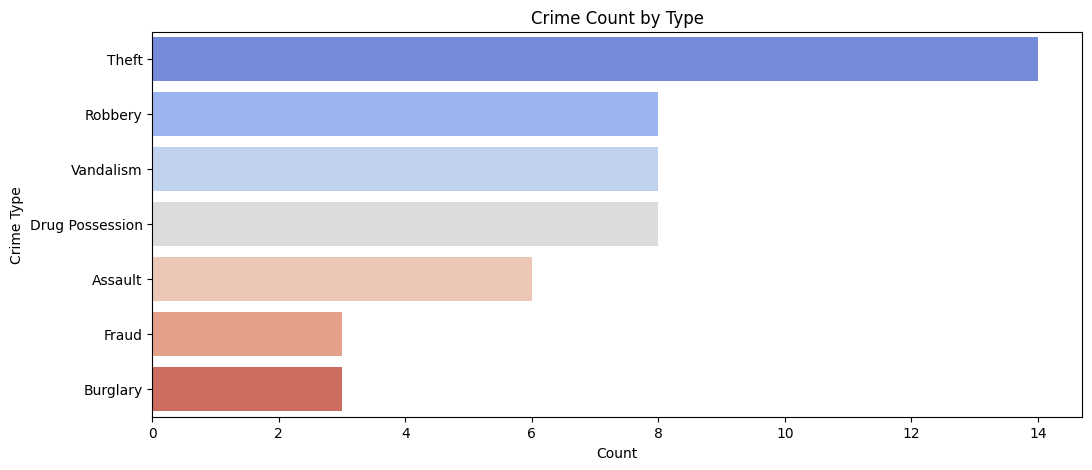

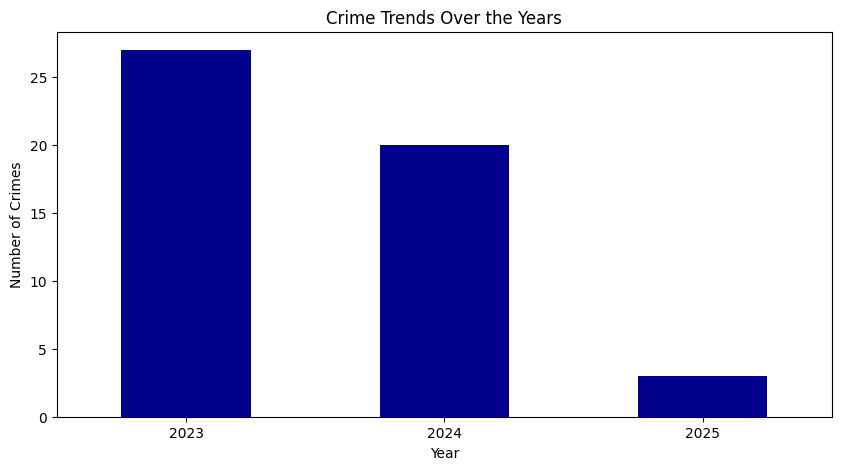

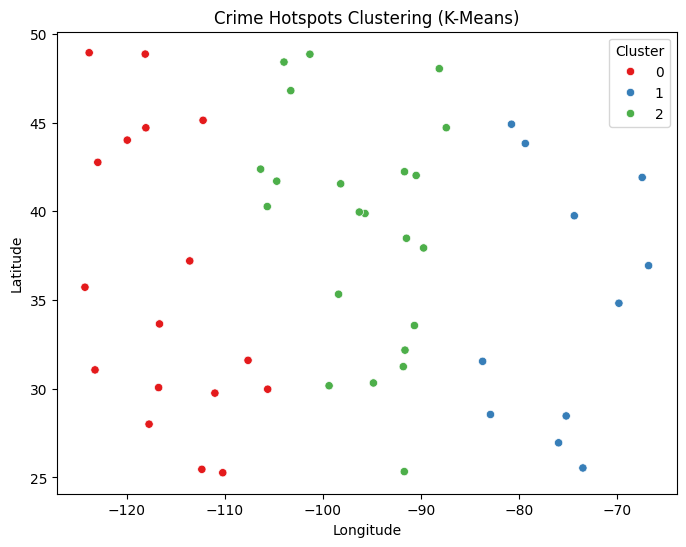


Clustered data saved as 'crime_data_clustered.csv'.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

crime_data = pd.read_csv("crime_data.csv")    # the crime data is taken and stored in the crime_data.csv file
print("\nDataset Summary:")
print(crime_data.info())
print("\nStatistical Summary:")
print(crime_data.describe())
crime_data.dropna(subset=["Crime Type", "Date", "Latitude", "Longitude"], inplace=True)

crime_data["Year"] = pd.to_datetime(crime_data["Date"], format="%d-%m-%Y", errors="coerce").dt.year

# Crime Type Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y="Crime Type", data=crime_data, palette="coolwarm", order=crime_data["Crime Type"].value_counts().index)
plt.title("Crime Count by Type")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

# Crime Trend Over the Years
plt.figure(figsize=(10, 5))
crime_data["Year"].value_counts().sort_index().plot(kind="bar", color="darkblue")
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()
crime_data.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Crime Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Added n_init to avoid warnings
crime_data["Cluster"] = kmeans.fit_predict(crime_data[["Latitude", "Longitude"]])

# Crime Hotspots Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Longitude", y="Latitude", hue="Cluster", data=crime_data, palette="Set1")
plt.title("Crime Hotspots Clustering (K-Means)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()

crime_data.to_csv("crime_data_clustered.csv", index=False)  # the data saved in the file below for the visualization 
print("\nClustered data saved as 'crime_data_clustered.csv'.")
